# Introduction

Almost each and every student has to go through placement process during the final year of their respective university courses. But what factors really affect the placement of a student? Is it their college degree percentage? School percentage? Performance in the entrance test of company?
We will be studying about all these factors in the given notebook. Not only this, we will also be developing a predictive model to classify if a given student can get a placement or not.

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
from matplotlib import pyplot as plt

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

# Exploratory Data Analysis

In [3]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Salary column has null values, since it is a continuous variable, we can use mean of the columns to fill the missing values. Median values can also be used but first we will have to study the distribution of the data.

In [4]:
sns.set(style="whitegrid")

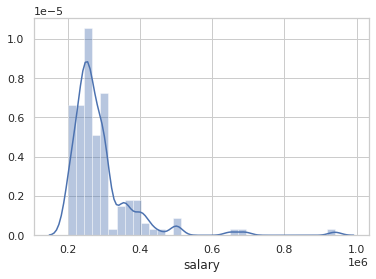

In [5]:
sns.distplot(dataset.salary)

Since distribution of salary variable is right skewed, we will use median method to fill the missing values as outliers can affect the mean in this case.

In [6]:
median_value=dataset['salary'].median()
dataset['salary']=dataset['salary'].fillna(median_value)

## Gender based analysis

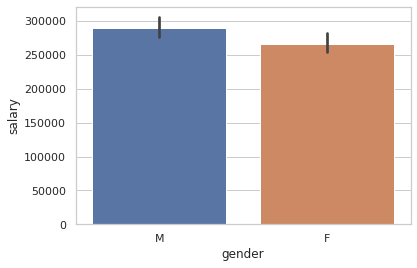

In [7]:
sns.barplot(x = dataset['gender'],y = dataset['salary'])

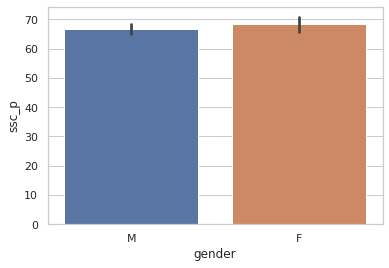

In [8]:
sns.barplot(x = dataset['gender'],y = dataset['ssc_p'])

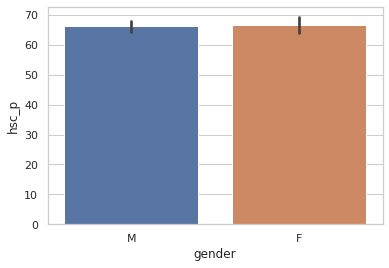

In [9]:
sns.barplot(x = dataset['gender'],y = dataset['hsc_p'])

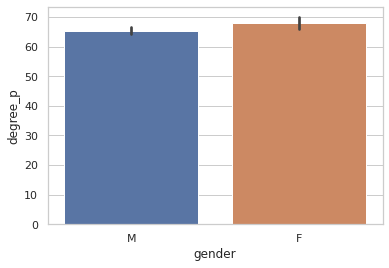

In [10]:
sns.barplot(x = dataset['gender'],y = dataset['degree_p'])

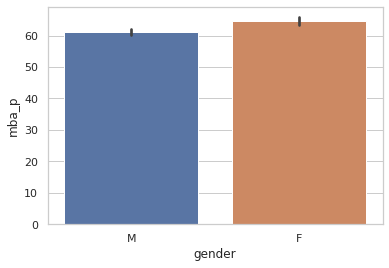

In [11]:
sns.barplot(x = dataset['gender'],y = dataset['mba_p'])

Observation 1 - Men are getting higher salaries than women even when women scored higher percentages during their school and college degrees.

## Placement status based analysis

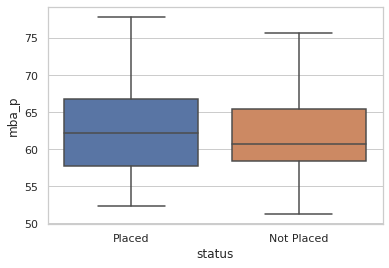

In [12]:
sns.boxplot(x = dataset['status'], y = dataset['mba_p'])

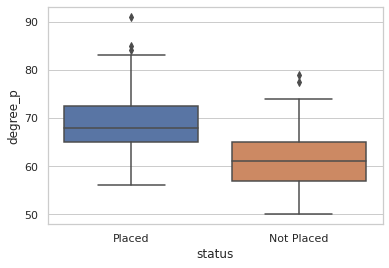

In [13]:
sns.boxplot(x = dataset['status'], y = dataset['degree_p'])

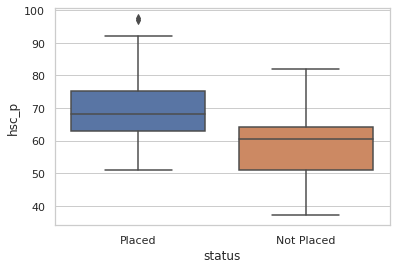

In [14]:
sns.boxplot(x = dataset['status'], y = dataset['hsc_p'])

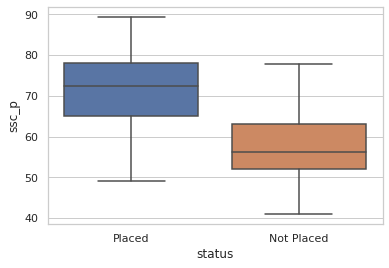

In [15]:
sns.boxplot(x = dataset['status'], y = dataset['ssc_p'])

Observation 2 - Students with higher percentages/better academic results were able to perform well during placements compared to those who had relatively lower academic results

## Salary vs Academic results

In [18]:
dataset=dataset[dataset.salary<600000]

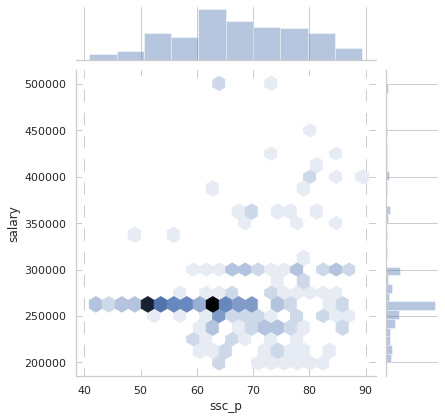

In [19]:
sns.jointplot(x = dataset['ssc_p'], y = dataset['salary'], kind='hex')

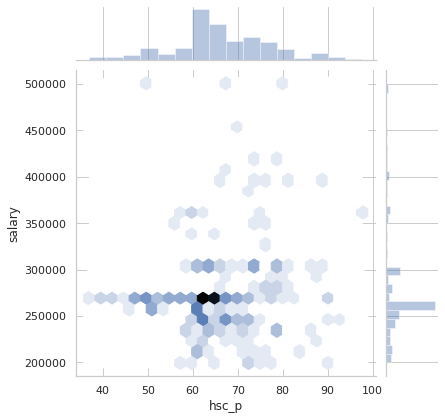

In [20]:
sns.jointplot(x = dataset['hsc_p'], y = dataset['salary'], kind='hex')

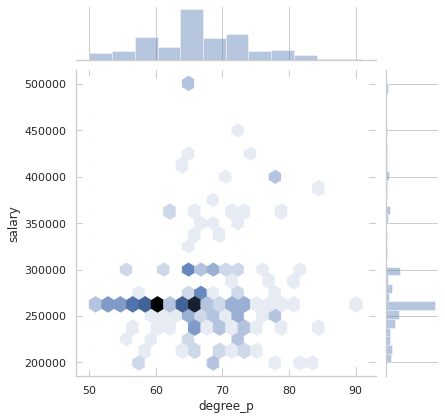

In [21]:
sns.jointplot(x = dataset['degree_p'], y = dataset['salary'], kind='hex')

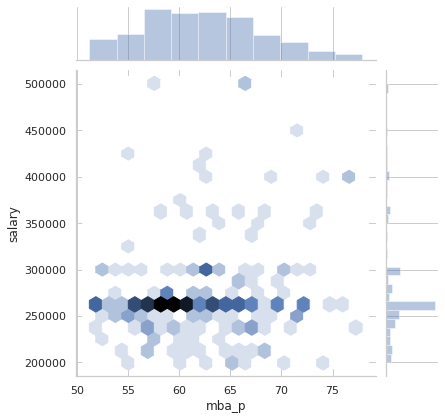

In [22]:
sns.jointplot(x = dataset['mba_p'], y = dataset['salary'], kind='hex')

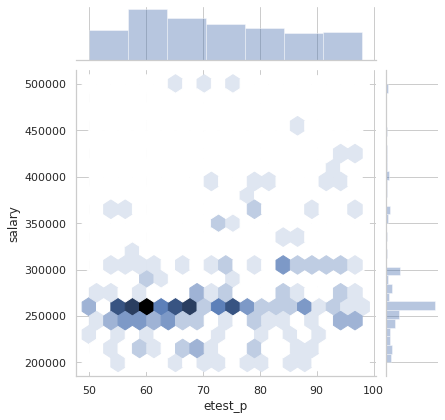

In [23]:
sns.jointplot(x = dataset['etest_p'], y = dataset['salary'], kind='hex')

Observation 3 - Students with average percentage of 60-70 are able to get around 250000 INR anually. Higher percentage does not neccesarily corresponds to higher salary package.

# Data Pre-processing

In [24]:
numeric_data = dataset.select_dtypes(include=[np.number])
cat_data = dataset.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 7 numeric and 8 categorical columns in train data


In [25]:
dataset.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [27]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encoder(df,col_name):
    df[col_name] = le.fit_transform(dataset[col_name])
    
encoder(dataset,'gender')
encoder(dataset,'ssc_b')
encoder(dataset,'hsc_b')
encoder(dataset,'hsc_s')
encoder(dataset,'degree_t')
encoder(dataset,'workex')
encoder(dataset,'specialisation')
encoder(dataset,'status')

In [28]:
# splitting dataset
target = dataset['status']
drop = ['sl_no','status']
train = dataset.drop(drop,axis=1)

In [42]:
# Using SMOTE to balance the categories

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)
train, target = smk.fit_sample(train,target)

# Model Building

### We will be using two models for comparison, one tree based and one non-tree based.

### 1. Decision Trees
### 2. Naive Baye's

In [44]:
#Now we will split the dataset in the ratio of 75:25 for train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.25, random_state = 0)

## Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', splitter='best',
                             max_depth=5, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=None,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight=None, 
                             presort='deprecated', ccp_alpha=0.0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.8767123287671232
Precision - 0.877133983298367
Recall - 0.8767123287671232
F1 - 0.8767586339957554


In [47]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.82


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

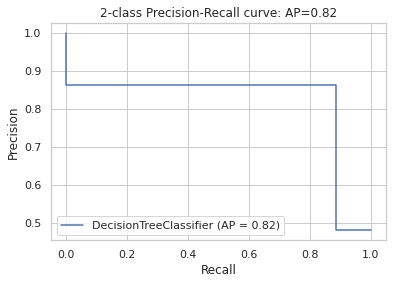

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [49]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

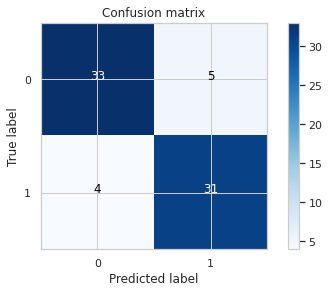

In [50]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Naive Baye's

In [51]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9452054794520548
Precision - 0.9504240052185258
Recall - 0.9452054794520548
F1 - 0.9449149024491489


In [53]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.94


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.94')

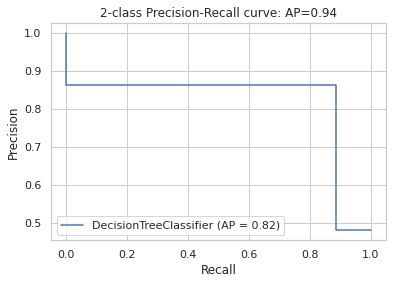

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

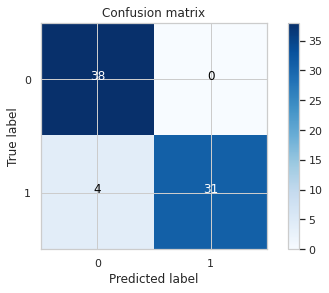

In [55]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

# Conclusion

With an average accuracy of 94%, Naive Baye's seems to be outperforming Decision Trees by 7%. After using SMOTE, we were able to obtain these better results. 
Why Naive Baye's?
Because Naive Baye's performs well when the size of dataset is small.